In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("https://raw.githubusercontent.com/phitronio/Python-for-ML/refs/heads/main/final-employee-ds.csv")

In [2]:
# Q1:

# print(data)
training_hours=np.array(data['TrainingHours'])
print(training_hours,training_hours.dtype)

training_hours=training_hours.astype(np.float64)
print(training_hours,training_hours.dtype)

mean=np.mean(training_hours)
standard_deviation=np.std(training_hours)

print(f"\nMean={mean}\nStandard Deviation={standard_deviation:.2f}")

[ 4 18 13 25  3 24 44 41 24 17 39  7 38 39 13 31 37 32 22 14 32 24 16 32
 46  1 13 39 39 38  5  5  2  6  7 41 14 46 28 32 29 38 26 35 28 37 32 36
 26 32  3 21  1  9  4  9 32 37 12 30 46 35 44 23 14 28  7  4 28 46  3 11
 44  1 26 30 35 35 25 42 26  4 19 10  9 39 37  5  7 22 46 25 45 42 11 25
 12 39 17 24] int64
[ 4. 18. 13. 25.  3. 24. 44. 41. 24. 17. 39.  7. 38. 39. 13. 31. 37. 32.
 22. 14. 32. 24. 16. 32. 46.  1. 13. 39. 39. 38.  5.  5.  2.  6.  7. 41.
 14. 46. 28. 32. 29. 38. 26. 35. 28. 37. 32. 36. 26. 32.  3. 21.  1.  9.
  4.  9. 32. 37. 12. 30. 46. 35. 44. 23. 14. 28.  7.  4. 28. 46.  3. 11.
 44.  1. 26. 30. 35. 35. 25. 42. 26.  4. 19. 10.  9. 39. 37.  5.  7. 22.
 46. 25. 45. 42. 11. 25. 12. 39. 17. 24.] float64

Mean=24.19
Standard Deviation=13.84


In [3]:
# Q2:

temp_data1=data.copy()

dept=data.groupby("Department")
unique_dept=temp_data1['Department'].unique()
dept_wise_median=dict(dept['Salary'].median())
# print(dept_wise_median)

# type-01
# temp_data1['Salary']=temp_data1['Salary'].fillna(temp_data1['Department'].map(dept_wise_median))

# type-02
for (i,j) in dept_wise_median.items():
    condition=(temp_data1['Department']==i) & (temp_data1['Salary'].isnull())
    temp_data1.loc[condition,'Salary']=j

temp_data1.to_csv('testing.csv')
# print(temp_data1)

filtered_employees=temp_data1.loc[(temp_data1['ExperienceYears']>12) & (temp_data1['ProjectCount']>5)]
# filtered_employees.to_csv('testing.csv')
total_salary_sum=filtered_employees['Salary'].sum()
print(total_salary_sum)



1985775.5


In [4]:
# Q3:

finance_or_it=temp_data1.loc[(temp_data1['Department']=='Finance') | (temp_data1['Department']=='IT')]

age30to45=finance_or_it.loc[(finance_or_it['Age']>=30) & (finance_or_it['Age']<=45)]

perform=age30to45.loc[(age30to45['PerformanceScore']>88)]

sort=perform.sort_values(['Salary'],ascending=False)

selected_col=pd.DataFrame(sort[['Name','Department','Salary','PerformanceScore']])

print(selected_col)
sort.to_csv('testing.csv')

           Name Department    Salary  PerformanceScore
94  Employee_95         IT  140386.0                94
88  Employee_89    Finance  126027.0                92
4    Employee_5    Finance   85543.0                97
32  Employee_33         IT   83919.0                98
55  Employee_56    Finance   49540.0                94


In [5]:
# Q4:

temp_data1['SalaryPerHour']=temp_data1['Salary']/(temp_data1['WorkHoursPerWeek']*4)

filtered=temp_data1.sort_values(['SalaryPerHour'],ascending=False)

top5=filtered.head(5)

selected_col=pd.DataFrame(top5[['Name','SalaryPerHour']])

print(selected_col)

top5.to_csv('testing.csv')

           Name  SalaryPerHour
46  Employee_47     981.278571
27  Employee_28     971.292857
31  Employee_32     967.392857
79  Employee_80     945.335526
80  Employee_81     937.858974


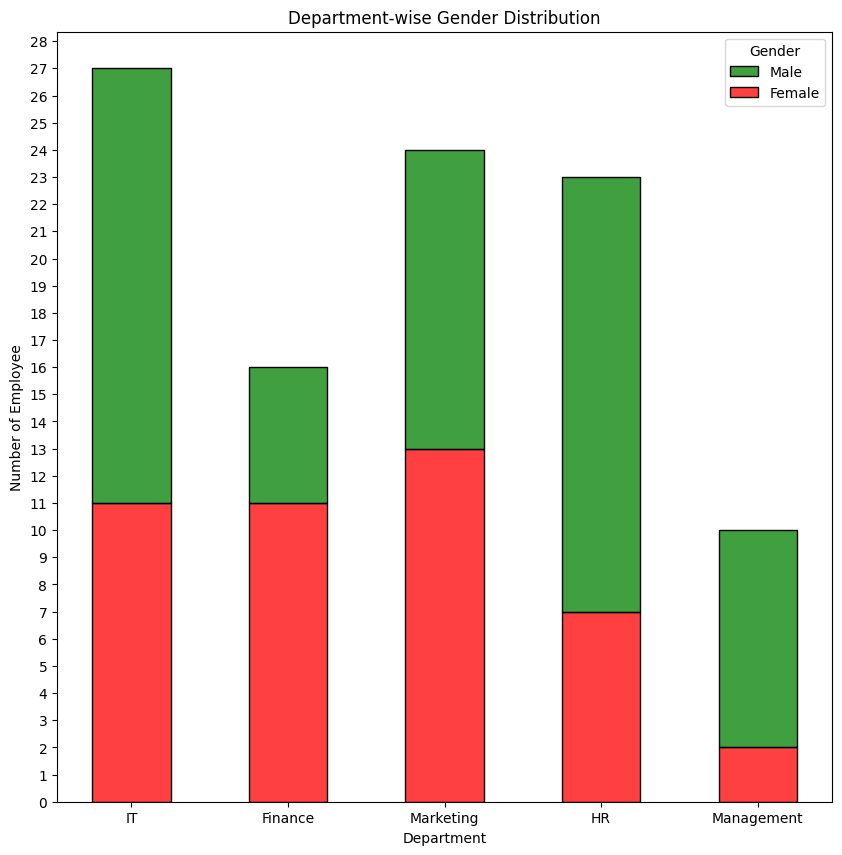

In [7]:
# Q5:

dept=pd.DataFrame(temp_data1[['Department',"Gender"]])

plt.figure(figsize=(10,10))
sns.histplot(
    data=dept,
    x='Department',
    hue='Gender',
    multiple='stack',
    shrink=0.5,
    palette=['green','red']
)
plt.title("Department-wise Gender Distribution")
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.yticks(np.arange(0,29,1))
plt.show()